# MICROECONOMICS ASSIGNMENT: GAME THEORY (complete information)

## Professor. Dr. Marcel Thum

## QUESTION 1: NASH EQUILIBRIUM IN SIMPLE AND NON-COOPERATIVE BARGAINING

The two players want to maximize their respective payoff in the non-cooperative setup. The total amount is USD 10.
The player $i$ chooses an amount $x_i$ such that his payoff is $u_i = x_i$. If $x_1+x_2 \leq 10$, then player $i$ receives payoff $x_i$, and the rest is destroyed.

#### Part a. Both players receive 0 if $x_1+x_2 > 10$

Proposition: The Nash solution is any pair $(x_1^*,x_2^*)$ such that $x_1^*+x_2^*=10$.

Proof: Suppose the pair chooses a solution $(x_1,x_2)$ such that $x_1+x_2 = 10 - \epsilon$, for $\epsilon >0$ and small, then both players can increase their payoff by moving to the solution pair $\left (x_1^*=x_1+\frac{\epsilon}{2},x_2^*=x_2+\frac{\epsilon}{2} \right)$, and this gives the outcome $x_1^*+x_2^*=10$. This matches the proposition.

Now consider the solution pair  $(x_1,x_2)$ such that $x_1+x_2 = 10 + \epsilon$,for $\epsilon >0$ and small, in this case both players get $0$ payoff. So, the players can divert to a solution pair, $\left (x_1^*=x_1-\frac{\epsilon}{2},x_2^*=x_2-\frac{\epsilon}{2} \right)$, so that the have respective payoffs $(x_1^*,x_2^*)$ and $x_1^*+x_2^*=10$. This matches the proposition.

Thus, the strategy pair provided in the proposition is the Nash Equilibrium as any divergence from this strategy is not stable.

#### Part b. When $x_1+x_2 > 10$, if $x_1=x_2$, then $x_1=x_2=5$. If $x_1 \neq x_2$, then the player with smaller $x_i$ gets $x_i$ and the other player gets $10-x_i$

Proposition: The Nash solution is the pair $(5,5)$.

Proof: From the first part, it is established that it is always suboptimal to arrive at a sum less than 10 because then both players can simultaneously increse their payoffs by diverting to a higher strategy. 

Suppose the strategy pair is $(5-\epsilon,5+\epsilon)$. Then player 1 can increase his payoff by setting $x_1=5$. Player 2 has no incentive to either increase or decrease $x_2$ because when $x_1=5$, then $x_2=5$. This will work both ways since this is a symmetric game and both players behave identically. 

Thus, the Nash Equilibrium is (5,5).

## QUESTION 2: NASH BARGAINING PROBLEM I

In [1]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
import scipy.optimize as sc

#### THE NASH BARGAINING SOLUTION

The Nash Bargaining payoff is given by $\Pi_N = (u_1-2) \cdot (u_2-5)$ and the resource constraint to this optimization problem is given by $u_1^2 + u_2^2 = 100$. This can be transformed into an unconstrained optimization problem, $$max_{u_2} \left ( \sqrt{100 - u_2^2} -2\right ) \cdot (u_2-5)$$

In [2]:
payoff = lambda u: -(np.sqrt(100-u**2)-2)*(u-5)
opt = sc.minimize(payoff,4.99,method='Nelder-Mead')
u1,u2 = np.sqrt(100-opt.x[0]**2),opt.x[0]

In [3]:
print('The optimal Nash Equilibrium solution: U1 = ',np.round(u1,4),' and U2 = ',np.round(u2,4))
print('The total Pareto Optiamal payoff is thus, ',np.round((u1-2)*(u2-5),4))

The optimal Nash Equilibrium solution: U1 =  6.0  and U2 =  8.0
The total Pareto Optiamal payoff is thus,  12.0


#### THE KALAI-SMORDINSKY SOLUTION

The Kalai-Smordinsky definition replaces an artificially set disagreement point with the best feasible solution for each player. In this situation, given the resource constraint, $u_1^2+u_2^2 = 100$, the best feasible solution for any player $i, i=\{1,2\}$,  is $u_1^* = u_2^* = 10$. This is replaced in the place of the disagreement point values in the payoff function, so that the unconstrained optimization problem is $$max_{u_2} (\sqrt{100-u_2^2}-10) \cdot (u_2-10) $$ From here, solving for $u_2$ and $u_1$ gives the equilibrium.

In [4]:
payoff = lambda u: -(np.sqrt(100-u**2)-10)*(u-10)
opt = sc.minimize(payoff,4.99,method='Nelder-Mead')
u1,u2 = np.sqrt(100-opt.x[0]**2),opt.x[0]

In [5]:
print('The Kalai Smordinsky solution is U1 =',np.round(u1,4),' and U2 = ',np.round(u2,4))
print('The final payoff in this solution is thus, ',(u1-10)*(u2-10))

The Kalai Smordinsky solution is U1 = 7.071  and U2 =  7.0711
The final payoff in this solution is thus,  8.578643762238777


It is noticeable in the solution that $u_1$ and $u_2$ differ by small amounts, so this can be approximately considered a symmetric solution. This follows because the players have identical "best feasible" points. 

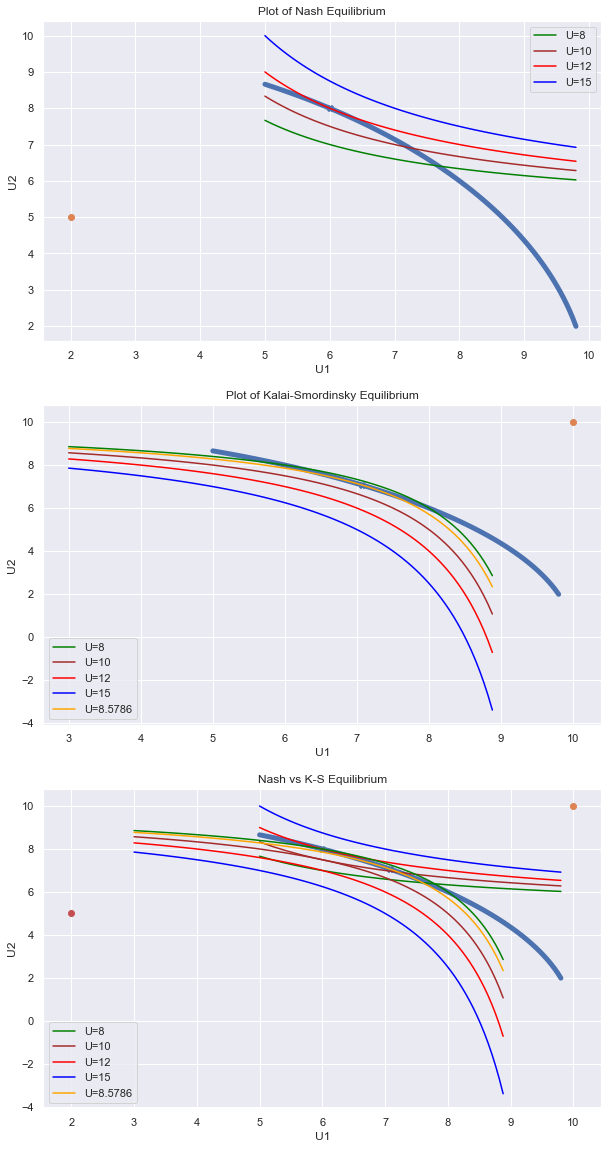

In [6]:
u1 = np.linspace(5,9.8,100)
u2 = np.sqrt(100-u1**2)
fig,ax = plt.subplots(3,1,figsize=(10,20))
#fig1,ax1 = plt.subplots(1,1,figsize=(10,6))
ax[0].plot(u1,u2,linewidth=5)
ax[1].plot(u1,u2,linewidth=5)
ax[2].plot(u1,u2,linewidth=5)
u_bars = {8:'green',10:'brown',12:'red',15:'blue'}
for u in u_bars:
    u1 = np.linspace(5,9.8,100)
    u2 = u/(u1-2)
    u2 = u2+5
    ax[0].plot(u1,u2,color=u_bars[u],label='U='+str(u))
    ax[2].plot(u1,u2,color=u_bars[u])
u_bars = {8:'green',10:'brown',12:'red',15:'blue',8.5786:'orange'}
for u in u_bars:
    u1 = np.linspace(3,8.88,100)
    u2 = 10-(u/(10-u1))
    #u2 = u2+10
    ax[1].plot(u1,u2,color=u_bars[u],label='U='+str(u))
    ax[2].plot(u1,u2,color=u_bars[u],label='U='+str(u))
ax[0].set_title('Plot of Nash Equilibrium')
ax[0].scatter(6,8,marker='X')
ax[0].scatter(2,5,marker='o')
ax[0].legend()
ax[1].set_title('Plot of Kalai-Smordinsky Equilibrium')
ax[1].scatter(7.07104,7.07109,marker='X')
ax[1].scatter(10,10,marker='o')
ax[1].legend()
ax[2].set_title('Nash vs K-S Equilibrium')
ax[2].scatter(7.07104,7.07109,marker='X')
ax[2].scatter(10,10,marker='o')
ax[2].scatter(6,8,marker='X')
ax[2].scatter(2,5,marker='o')
ax[2].legend()
ax[0].set_xlabel('U1')
ax[0].set_ylabel('U2')
ax[1].set_xlabel('U1')
ax[1].set_ylabel('U2')
ax[2].set_xlabel('U1')
ax[2].set_ylabel('U2')
plt.show()
plt.close()

Some notes for the figures: 
1. The plot for Kalai Smordinsky, the domain of U1 is kept restricted to make the plot readable and show the solution point.
2. For both plots, the solution payoff is included in the plot.

The Nash Solution gives a higher payoff to player 2 and this follows from player 2 having a higher disagreement point. The Kalai-Smordinsky solution is (approximately) symmetric since the 'best feasible' outcome for both players is identical.

The Kalai-Smordinsky is also a dual representation of the Nash Bargaining problem since the players are moving "down" from their respective best feasible solutions. The outcome from the Kalai-Smordinsky problem will make players worse-off at the individual level since they are not at their best feasible solutions.

## QUESTION 3 : THE NASH BARGAINING PROBLEM II

This question is about the strategic decision of public good. This is different from the original Nash Bargaining problem in that the individual payoffs now depend on a decision taken by the other player. So, the solution search considers the individual optimization by each player, and takes the decision by the other player as a parameter. 
The given problem has two players, $i=1,2$. 
For player 1, the payoff is $U_1 = x_1 \cdot (g_1+g_2)$ such that, $m_1 = x_1+g_1$, and for player 2, the payoff is $U_2 = x_2 \cdot (g_1+g_2)$ such that, $m_2 = x_2+g_2$. 

#### Part a. THE DISAGREEMENT POINT

The disagreement point is the outcome when the negotiations break down, in this case, if the negotiations break down then both players will decide to consume their entire endownments without investing in the public good, that is $x_i = m_i$ for $i=1,2$ and $g_1 = g_2 = 0$. This is a disagreement point because this is within the set of feasible solutions, and $U_i(x_i=m_i) = U_i(g_1=0,g_2=0)= 0$. 

#### Part b. THE NASH BARGAINING SOLUTION

Beginning with the problem of player 1, he will maximize $U_1 = x_1 \cdot (g_1+g_2)$ subject to, $m_1 = g_1+g_2$, so the unconstrained optimization problem is $max_{g_1} (m_1-g_1) \cdot (g_1+g_2) \implies 2g_1 + g_2 = m_1$. 

Similarly for player 2, the unconconstrained optimization probelm is $max_{g_2} (m_2-g_2) \cdot (g_1+g_2) \implies 2g_2 + g_1 = m_2$.

Solving these equations simulatneously generates the Nash Bargaining solution, $g_1^* = \frac{2m_1-m_2}{3}$ and $g_2^* = \frac{2m_2-m_1}{3}$.

                                                                                                  Author - Sukanya Mukherjee
 
                                                                                               Institute - IWH Halle (Saale)
                                                                                               
                                                                                                      Date - 8 December 2022

In [7]:
print(date.today())

2022-12-08
